In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
humidity_df = pd.read_csv('weather/humidity.csv')
pressure_df = pd.read_csv('weather/pressure.csv')
temperature_df = pd.read_csv('weather/temperature.csv')
weather_description_df = pd.read_csv('weather/weather_description.csv')
wind_direction_df = pd.read_csv('weather/wind_direction.csv')
wind_speed_df = pd.read_csv('weather/wind_speed.csv')
wind_direction_df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,360.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,0.0,0.0,150.0,0.0,0.0,0.0,0.0,10.0,360.0,...,270.0,260.0,230.0,60.0,135.0,101.0,30.0,336.0,336.0,329.0
2,2012-10-01 14:00:00,6.0,4.0,147.0,2.0,0.0,0.0,8.0,9.0,360.0,...,270.0,260.0,230.0,60.0,157.0,315.0,30.0,336.0,336.0,329.0
3,2012-10-01 15:00:00,20.0,18.0,141.0,10.0,0.0,0.0,23.0,9.0,360.0,...,271.0,260.0,231.0,60.0,157.0,307.0,30.0,336.0,336.0,329.0
4,2012-10-01 16:00:00,34.0,31.0,135.0,17.0,0.0,0.0,37.0,9.0,360.0,...,272.0,260.0,233.0,60.0,157.0,294.0,30.0,336.0,336.0,329.0


In [3]:
humidity = humidity_df[['datetime', 'Albuquerque']]
pressure = pressure_df[['datetime', 'Albuquerque']]
temperature = temperature_df[['datetime', 'Albuquerque']]
weather_description = weather_description_df[['datetime', 'Albuquerque']]
wind_direction = wind_direction_df[['datetime', 'Albuquerque']]
wind_speed = wind_speed_df[['datetime', 'Albuquerque']]


In [4]:
weather_df = (weather_description.merge(humidity, on = 'datetime')
             .merge(pressure, on = 'datetime')
             .merge(temperature, on = 'datetime')
             .merge(wind_direction, on = 'datetime')
             .merge(wind_speed, on = 'datetime')
             )
weather_df.columns = ['Datetime', 'Description', 'Humidity', 'Pressure', 'Temperature', 'Wind_Direction', 'Wind_Speed']
#weather_df['Temperature_C'] = weather_df['Temperature'] 
weather_df.head()

,Datetime,Description,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,sky is clear,50.0,1024.0,285.120000,360.0,4.0
2,2012-10-01 14:00:00,sky is clear,49.0,1024.0,285.154558,360.0,4.0
3,2012-10-01 15:00:00,sky is clear,49.0,1024.0,285.233952,360.0,4.0
4,2012-10-01 16:00:00,sky is clear,49.0,1024.0,285.313345,360.0,4.0


In [5]:
weather_df.shape

(45253, 7)

In [6]:
weather_df.size

316771

In [7]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        45253 non-null  object 
 1   Description     45252 non-null  object 
 2   Humidity        44543 non-null  float64
 3   Pressure        44797 non-null  float64
 4   Temperature     45252 non-null  float64
 5   Wind_Direction  45252 non-null  float64
 6   Wind_Speed      45249 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.8+ MB


In [8]:
#Convert dates to datetime format
weather_df['Datetime'] = pd.to_datetime(weather_df['Datetime']);
weather_df['Datetime'].head()

0   2012-10-01 12:00:00
1   2012-10-01 13:00:00
2   2012-10-01 14:00:00
3   2012-10-01 15:00:00
4   2012-10-01 16:00:00
Name: Datetime, dtype: datetime64[ns]

In [9]:
weather_df.describe()

,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed
count,44543.000000,44797.000000,45252.000000,45252.000000,45249.000000
mean,45.186157,1012.292185,285.617856,199.878458,2.763685
std,23.336546,39.049838,9.853484,104.462490,2.300933
min,5.000000,810.000000,255.042333,0.000000,0.000000
25%,26.000000,1015.000000,277.970000,125.000000,1.000000
50%,42.000000,1021.000000,286.120000,210.000000,2.000000
75%,63.000000,1025.000000,292.835643,292.000000,4.000000
max,100.000000,1054.000000,312.710000,360.000000,22.000000


In [10]:
weather_df.corr()

,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed
Humidity,1.000000,0.057773,-0.489555,-0.035804,-0.213665
Pressure,0.057773,1.000000,-0.081278,-0.037721,0.033328
Temperature,-0.489555,-0.081278,1.000000,-0.088087,0.120192
Wind_Direction,-0.035804,-0.037721,-0.088087,1.000000,0.133700
Wind_Speed,-0.213665,0.033328,0.120192,0.133700,1.000000


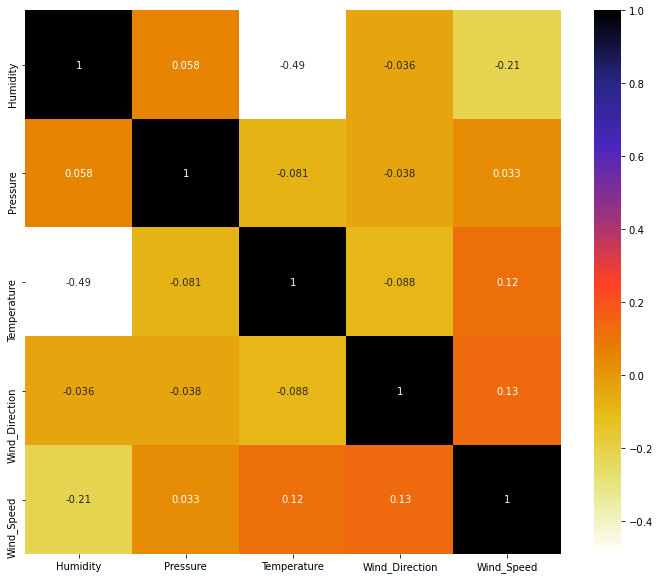

In [11]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = weather_df.corr()
sns.heatmap(cor, annot= True, cmap=plt.cm.CMRmap_r)
plt.show()

In [12]:
missing_data = weather_df.isnull().sum().sort_values(ascending=False)
percentage_missing_data = weather_df.isnull().sum()/weather_df.isnull().count().sort_values(ascending = False) * 100
missing_values = pd.concat([missing_data, percentage_missing_data], axis=1, keys=['missing_data', 'percentage'])
missing_values


,missing_data,percentage
Humidity,710,1.568957
Pressure,456,1.007668
Wind_Speed,4,0.008839
Wind_Direction,1,0.002210
Temperature,1,0.002210
Description,1,0.002210
Datetime,0,0.000000


In [13]:
weather_df.isnull().sum().sort_values(ascending = False)

Humidity          710
Pressure          456
Wind_Speed          4
Wind_Direction      1
Temperature         1
Description         1
Datetime            0
dtype: int64

In [14]:
weather_df.dropna(inplace=True)

In [15]:
weather_df.isnull().sum().sort_values(ascending = False)

Wind_Speed        0
Wind_Direction    0
Temperature       0
Pressure          0
Humidity          0
Description       0
Datetime          0
dtype: int64

In [16]:
weather_df.size

311535

In [17]:
weather_df.shape

(44505, 7)

### VISUALIZING DISTRIBUTIONS

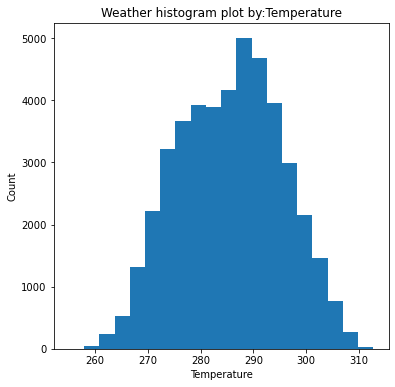

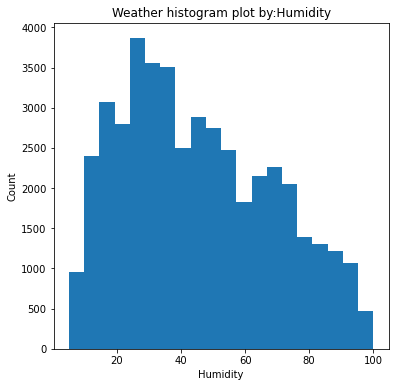

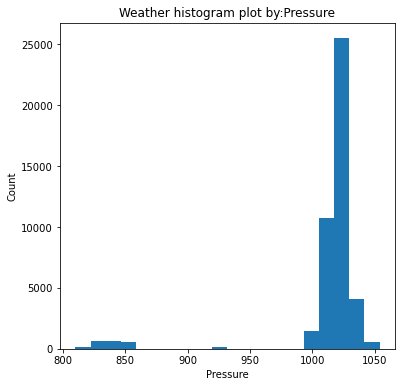

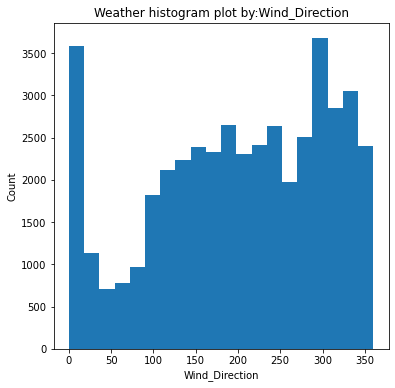

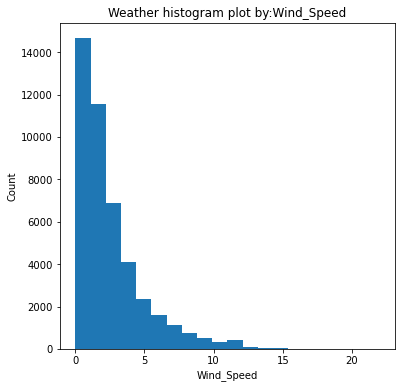

In [18]:
#Histograms look at distribution of numeric data
def plot_histogram(weather_df, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6))
        ax = fig.gca()
        bins = 20
        weather_df[col].plot.hist(ax=ax, bins=bins)
        ax.set_title("Weather histogram plot by:" + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        plt.show()
   
plt_cols = ['Temperature', 'Humidity', 'Pressure', 'Wind_Direction', 'Wind_Speed']
plot_histogram(weather_df, plt_cols)

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


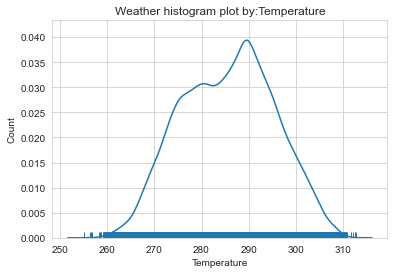

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


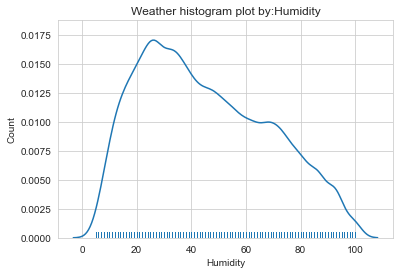

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


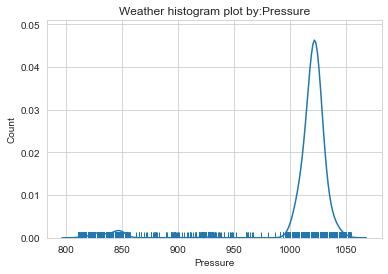

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


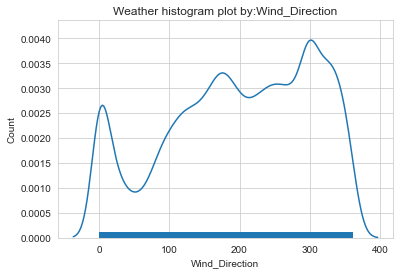

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


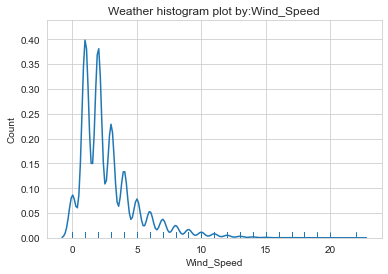

In [19]:
def plot_density_hist(weather_df, cols, bins = 20, hist=False):
    for col in cols:
        sns.set_style('whitegrid')
        sns.distplot(weather_df[col], bins=bins, rug=True, hist = hist)
        
        plt.title("Weather histogram plot by:" + col)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()
    
plot_density_hist(weather_df, plt_cols)

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


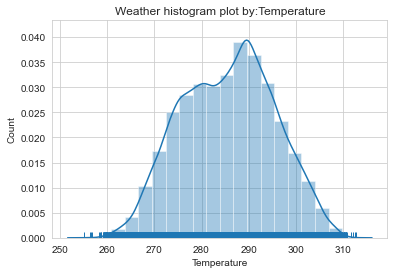

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


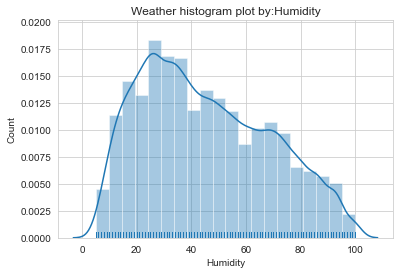

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


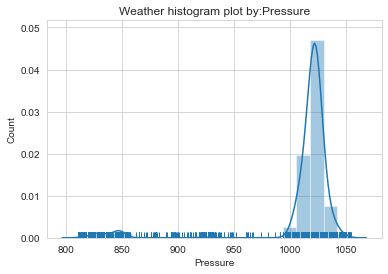

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


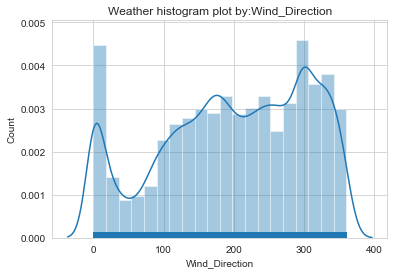

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


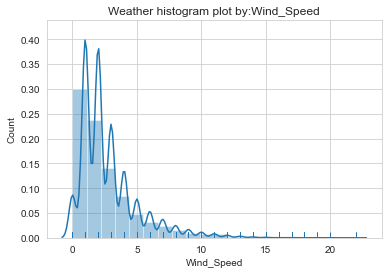

In [20]:
plot_density_hist(weather_df, plt_cols, hist=True)

### VISUALIZING DATA RELATIONSHIPS

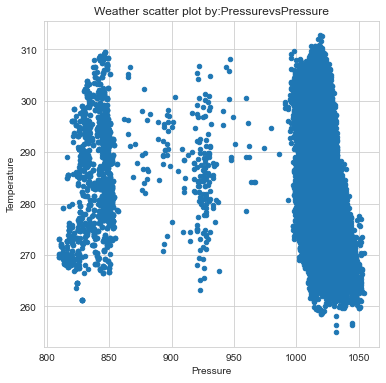

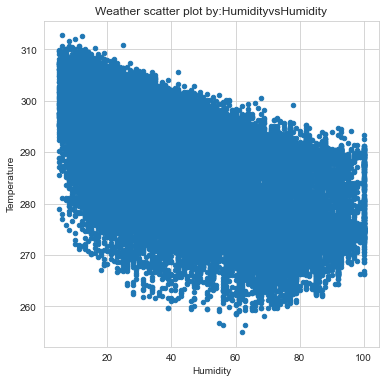

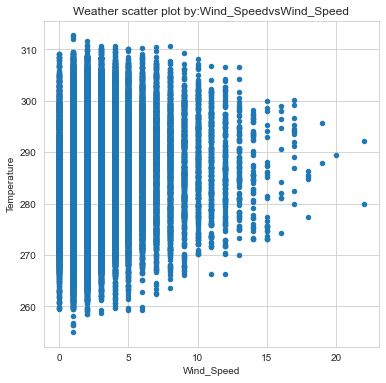

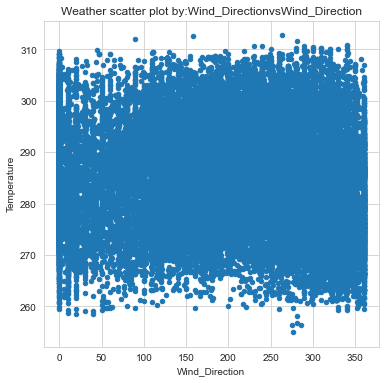

In [21]:
def plot_scatter(weather_df, cols, col_y ="Temperature"):
    for col in cols:
        fig = plt.figure(figsize=(6,6))
        ax = fig.gca()
        bins = 20
        weather_df.plot.scatter(x=col, y=col_y, ax = ax)
        ax.set_title("Weather scatter plot by:" + col + 'vs' + col)
        ax.set_xlabel(col)
        ax.set_ylabel(col_y)
        plt.show()
   
num_cols = ['Pressure', 'Humidity', 'Wind_Speed', 'Wind_Direction']
plot_scatter(weather_df, num_cols)

DEALING WITH OVERPLOTTING USING TRANSPARENCY

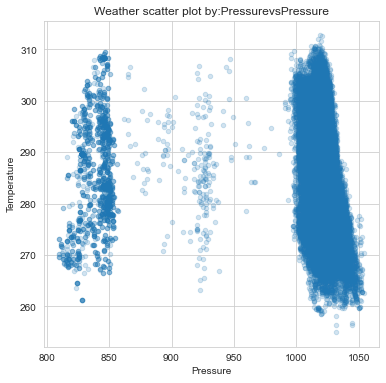

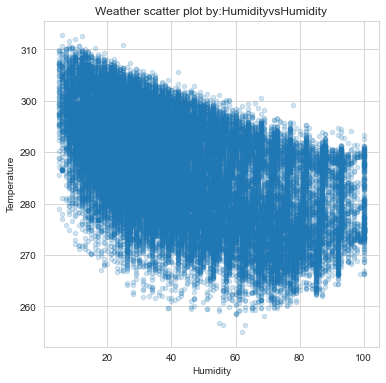

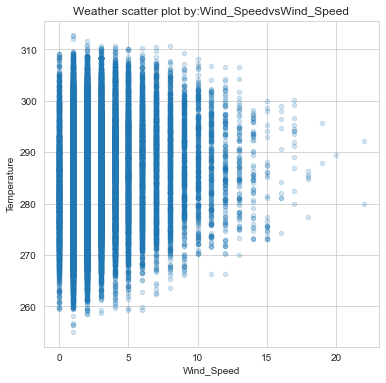

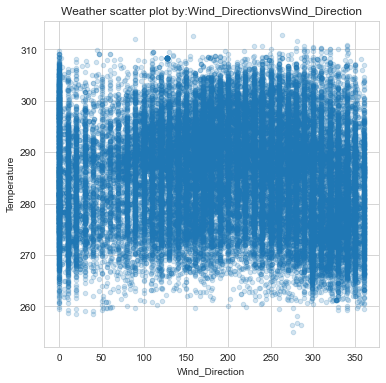

In [22]:
#Alpha which deals with transparency does not work well with a huge data set
def plot_scatter(weather_df, cols, col_y ="Temperature", alpha=1.0):
    for col in cols:
        fig = plt.figure(figsize=(6,6))
        ax = fig.gca()
        bins = 20
        weather_df.plot.scatter(x=col, y=col_y, ax = ax, alpha=alpha)
        ax.set_title("Weather scatter plot by:" + col + 'vs' + col)
        ax.set_xlabel(col)
        ax.set_ylabel(col_y)
        plt.show()
   
num_cols = ['Pressure', 'Humidity', 'Wind_Speed', 'Wind_Direction']
plot_scatter(weather_df, num_cols, alpha=0.2)

DEALING WITH OVERPLOTTING USING CONTOUR PLOTS

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


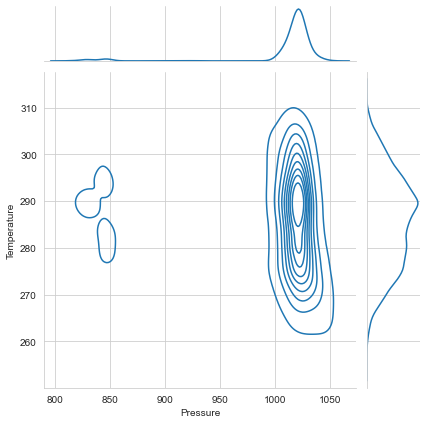

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


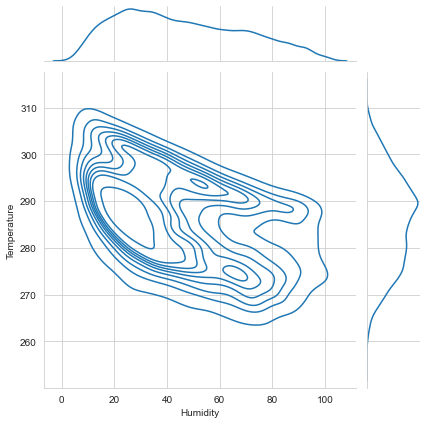

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


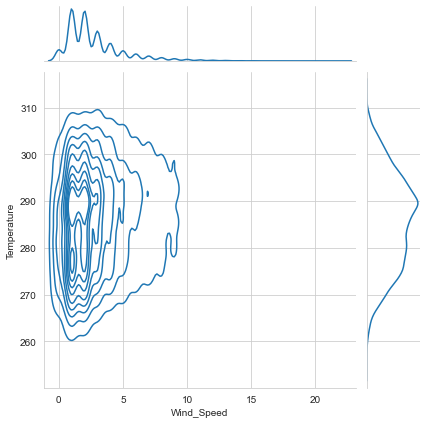

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


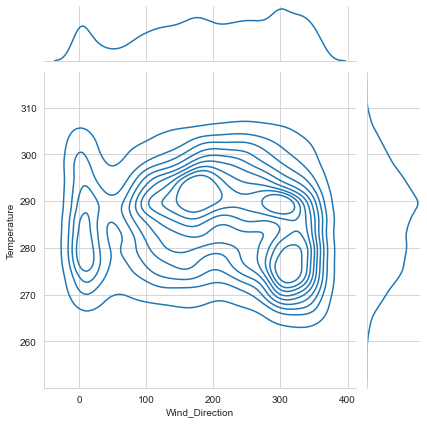

In [23]:
def plot_density_2d(weather_df, cols, col_y='Temperature', kind='kde'):
    for col in cols:
        sns.set_style('whitegrid')
        sns.jointplot(col, col_y, data=weather_df, kind=kind)
        
        plt.xlabel(col)
        plt.ylabel(col_y)
        plt.show()
    
plot_density_2d(weather_df, num_cols)

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


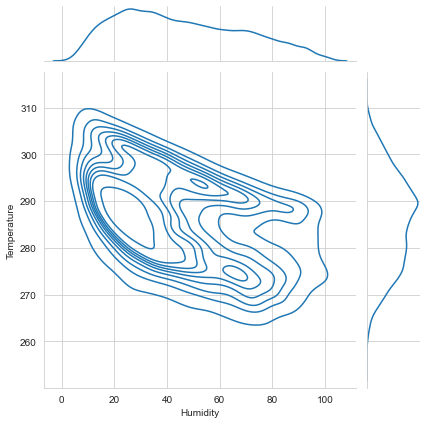

In [24]:
sns.jointplot('Humidity', 'Temperature', data=weather_df, kind='kde')

DEALING WITH OVERPLOTTING USING HEXBIN PLOTS

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


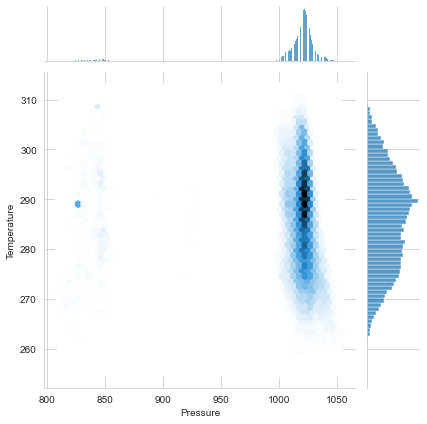

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


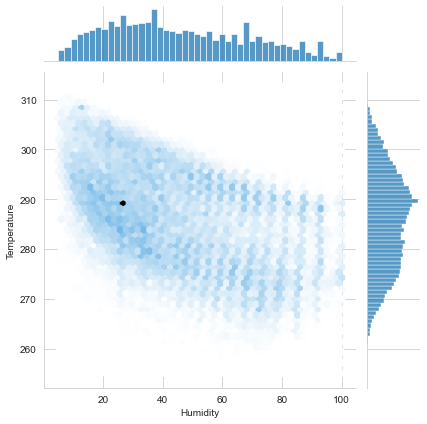

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


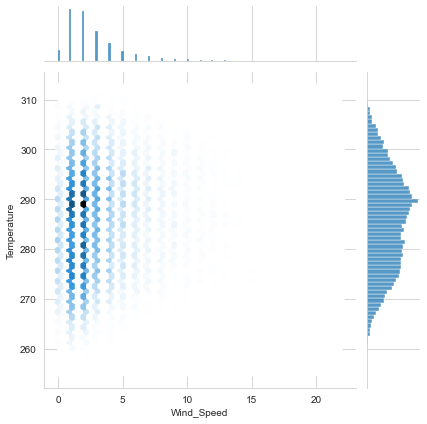

/Users/georgreen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


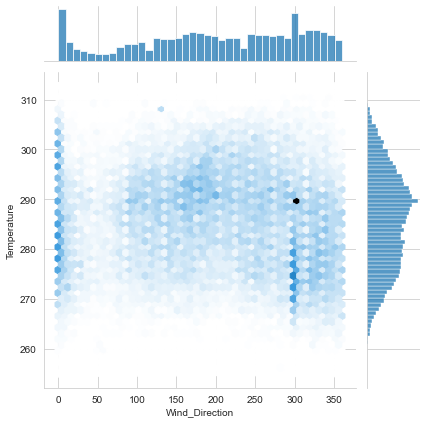

In [25]:
plot_density_2d(weather_df, num_cols, kind="hex")

In [26]:
#Visualizing Categorical Relationships